In [45]:
# 加载matplotlib。pyplot库
import matplotlib.pyplot as plt
#让图形在notebook中自动显示
% matplotlib inline

# 加载pandas库（用于数据管理）
import pandas as pd
# 加载seaborn库
import seaborn as sns
# 华文细黑是相对而言显示效果极好的中文字体
plt.rcParams["font.family"] = "STXIHEI"

#准备CCSS数据集
ccss = pd.read_excel("ccss_sample.xlsx")
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


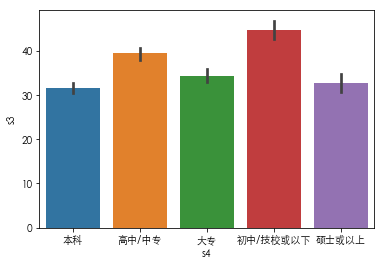

In [46]:
sns.barplot(x = ccss.s4, y = ccss.s3)

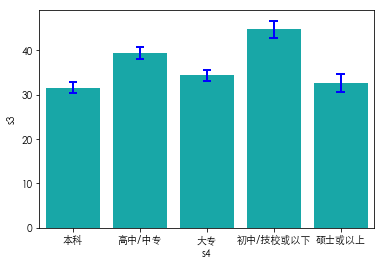

In [47]:
sns.barplot(x = ccss.s4, y = ccss.s3, color = 'c',
            errcolor = 'b', errwidth = '2', capsize = .1)

Text(0,0.5,'S3：年龄均值')

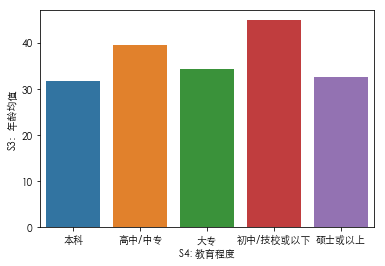

In [48]:
# 如何不绘制CI
sns.barplot(x = ccss.s4, y = ccss.s3, ci = None)
plt.xlabel("S4: 教育程度")
plt.ylabel("S3：年龄均值")

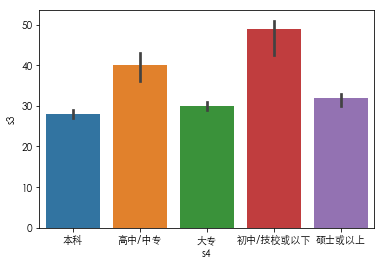

In [49]:
import numpy as np

sns.barplot(x = ccss.s4, y = ccss.s3, estimator = np.median)

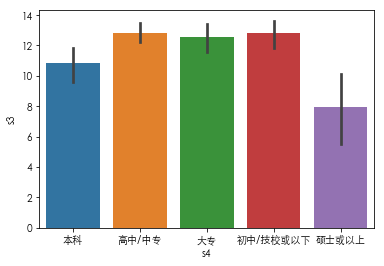

In [50]:
 sns.barplot(x = ccss.s4, y = ccss.s3, estimator = np.std)

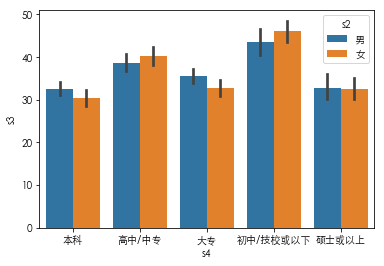

In [51]:
sns.barplot(x = ccss.s4, y = ccss.s3, hue = ccss.s2)

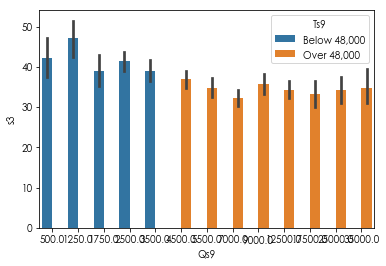

In [52]:
# 存在嵌套分组
sns.barplot(x = ccss.Qs9, y = ccss.s3, hue = ccss.Ts9)

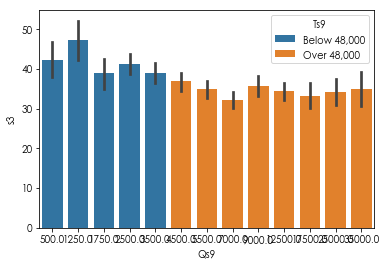

In [53]:
# 存在嵌套分组时不调整直条宽度
sns.barplot(x = ccss.Qs9, y = ccss.s3, hue = ccss.Ts9, dodge = False)

In [54]:
# 利用Pandas的汇总功能生成所需汇总数据
tmpdf = pd.crosstab(index = ccss.s0, columns = ccss.s4)
tmpdf

s4,初中/技校或以下,大专,本科,硕士或以上,高中/中专
s0,,,,,
上海,47,87,108,23,122
北京,59,116,101,19,83
广州,48,128,83,15,108


In [11]:
# 取出所需的汇总行
tmpdf.loc[['上海']]

s4,初中/技校或以下,大专,本科,硕士或以上,高中/中专
s0,,,,,
上海,47,87,108,23,122


In [12]:
# 取出所需的汇总行（序列格式）
tmpdf.loc['上海']

s4
初中/技校或以下     47
大专           87
本科          108
硕士或以上        23
高中/中专       122
Name: 上海, dtype: int64

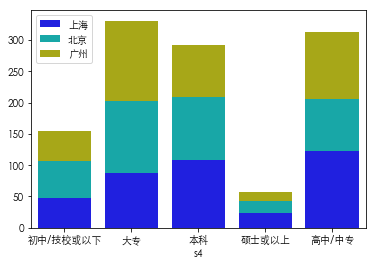

In [13]:
# 分三次使用seaborn绘制三个类别的直条，并依次叠加
sns.barplot(data = tmpdf.loc[['上海']], color = 'b', label = '上海')
sns.barplot(data = tmpdf.loc[['北京']], bottom = tmpdf.loc['上海'],
            color = 'c', label = '北京')
# 注意bottom参数需要累加已有的所有直条类别高度
sns.barplot(data = tmpdf.loc[['广州']],
            bottom = tmpdf.loc['北京'] + tmpdf.loc['上海'],
            color = 'y', label = '广州')
plt.legend()

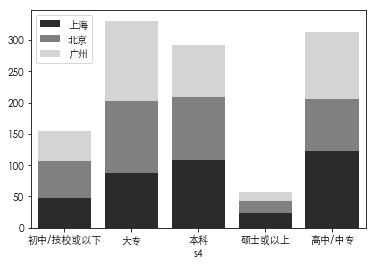

In [14]:
# 使用循环程序自动生成图形
tmpdf = pd.crosstab(index = ccss.s0, columns = ccss.s4)
colorstep0 = 1/len(tmpdf.index)
for i in range(len(tmpdf.index)):
    if i == 0:
        colorstep = colorstep0 / 2 # 避免最终出现纯白色直条
        sns.barplot(data = tmpdf.loc[[tmpdf.index[i]]],
                    color = str(colorstep), label = tmpdf.index[i])
        base = tmpdf.loc[tmpdf.index[i]]
    else:
        sns.barplot(data = tmpdf.loc[[tmpdf.index[i]]],
                    color = str(colorstep), bottom = base,
                    label = tmpdf.index[i])
        base = base + tmpdf.loc[tmpdf.index[i]]
    colorstep = colorstep + colorstep0
plt.legend()

In [15]:
pd.crosstab(index = ccss.s0, columns = ccss.s4, normalize = "columns")

s4,初中/技校或以下,大专,本科,硕士或以上,高中/中专
s0,,,,,
上海,0.305195,0.262840,0.369863,0.403509,0.389776
北京,0.383117,0.350453,0.345890,0.333333,0.265176
广州,0.311688,0.386707,0.284247,0.263158,0.345048


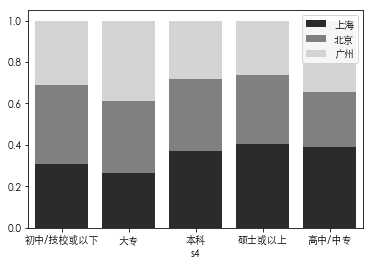

In [16]:
tmpdf = pd.crosstab(index = ccss.s0, columns = ccss.s4,
                    normalize = "columns")
colorstep0 = 1/len(tmpdf.index)
for i in range(len(tmpdf.index)):
    if i == 0:
        colorstep = colorstep0 / 2 # 避免最终出现纯白色直条
        sns.barplot(data = tmpdf.loc[[tmpdf.index[i]]],
                    color = str(colorstep), label = tmpdf.index[i])
        base = tmpdf.loc[tmpdf.index[i]]
    else:
        sns.barplot(data = tmpdf.loc[[tmpdf.index[i]]],
                    color = str(colorstep), bottom = base,
                    label = tmpdf.index[i])
        base = base + tmpdf.loc[tmpdf.index[i]]
    colorstep = colorstep + colorstep0
plt.legend()

In [21]:
sumdata = ccss.groupby('time').index1.mean()
sumdata

time
200704     98.336327
200712     94.139120
200812     90.439330
200912    101.996231
Name: index1, dtype: float64

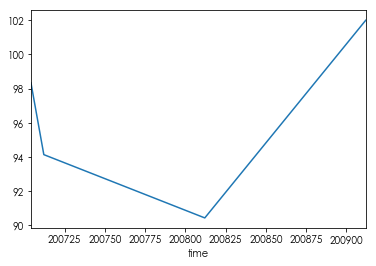

In [22]:
sumdata.plot()

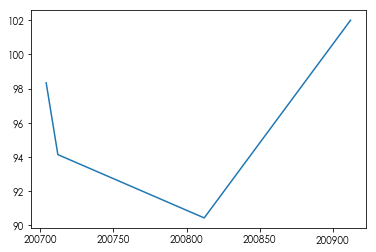

In [20]:
plt.plot(sumdata)

In [23]:
# 将数值索引转换为字符串格式
sumdata.index.astype('str')

Index(['200704', '200712', '200812', '200912'], dtype='object', name='time')

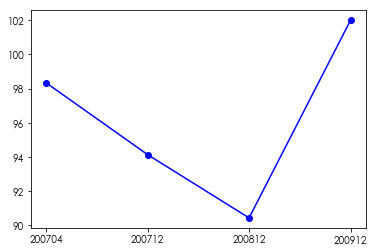

In [24]:
plt.plot(sumdata.index.astype('str'), sumdata, 'bo-')

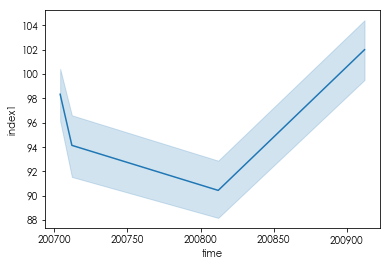

In [25]:
# 错误地使用lineplot
sns.lineplot(ccss.time, ccss.index1)

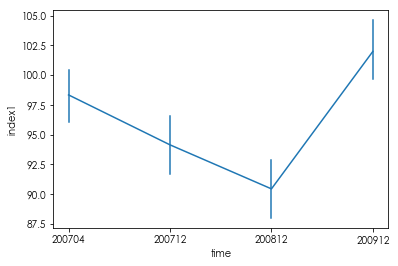

In [27]:
# 正确的使用lineplot， x轴变量设定为分类，误差修改为离散条状
sns.lineplot(ccss.time.astype('str'), ccss.index1, err_style = 'bars')

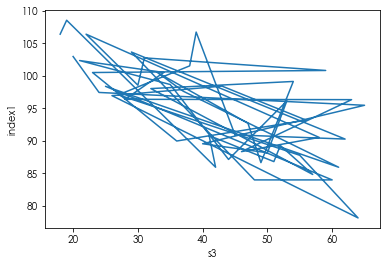

In [29]:
#  只绘制线图
sns.lineplot(ccss.s3, ccss.index1, ci = None)#, sort = False

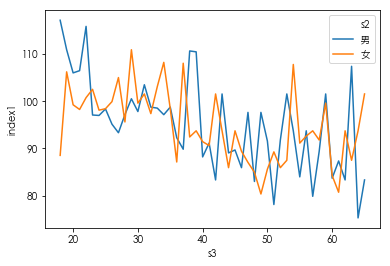

In [30]:
# 绘制分组线图
sns.lineplot(ccss.s3, ccss.index1, hue = ccss.s2, ci = None)

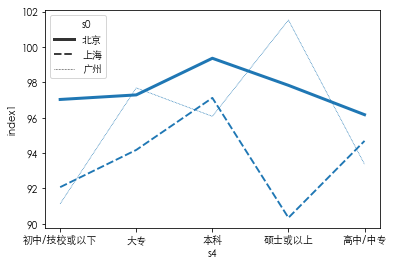

In [31]:
# 使用线形
sns.lineplot('s4', 'index1', data = ccss, 
             style = 's0', size = 's0', ci = None)

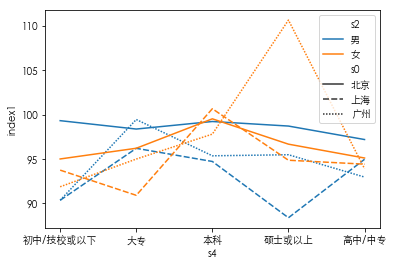

In [32]:
# 在图例中同时包含颜色和线条
sns.lineplot('s4', 'index1', 's2', data = ccss,
             style = 's0', ci = None)

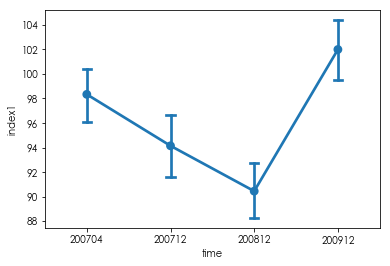

In [33]:
sns.pointplot(x = ccss.time, y = ccss.index1, capsize = .1)

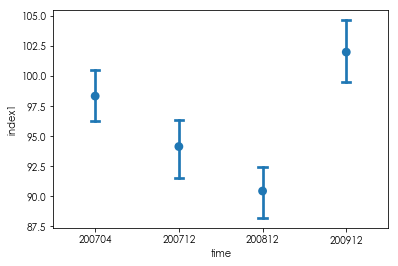

In [34]:
# 不绘制连线
sns.pointplot(x = ccss.time, y = ccss.index1,
              capsize = .1, join = False)

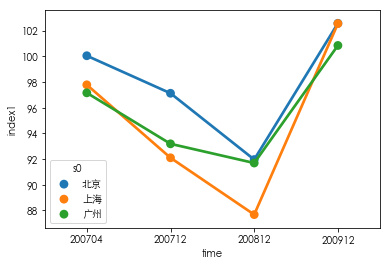

In [35]:
sns.pointplot(x = ccss.time, y = ccss.index1, hue = ccss.s0, ci = None)

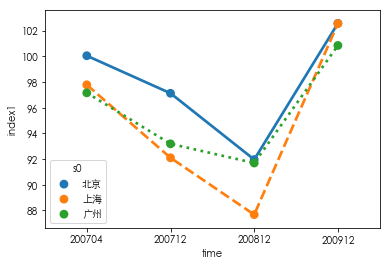

In [36]:
# 增加线形修饰
sns.pointplot(x = ccss.time, y = ccss.index1, hue = ccss.s0,
              ci = None, linestyles = ['-', '--', ':'])

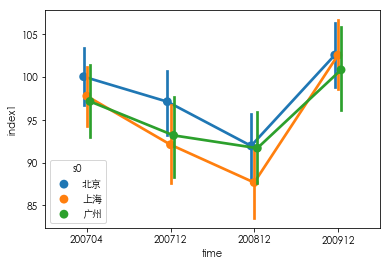

In [37]:
# 稍微错开CI的位置以便于观察
sns.pointplot(x = ccss.time, y = ccss.index1,
              hue = ccss.s0, dodge = True)

In [38]:
ccss.a3.value_counts()

3 基本不变      487
2 略有好转      338
1 明显好转      143
4 略有变差       94
5 明显变差       69
9 说不清/拒答     16
Name: a3, dtype: int64

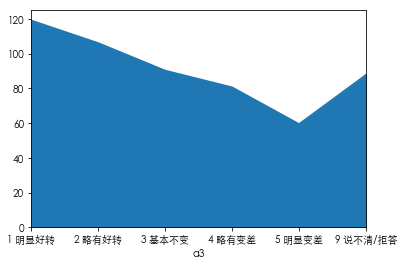

In [39]:
ccss.groupby('a3').index1.mean().plot.area()

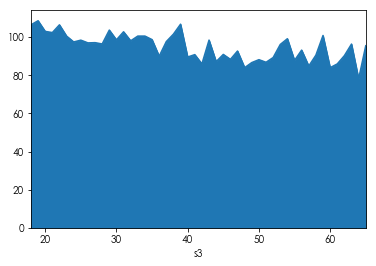

In [41]:
ccss.groupby('s3').index1.mean().plot.area()

In [57]:
tmpdf = pd.crosstab(index = ccss.s4, columns = ccss.O1)
tmpdf

O1,有,没有
s4,,
初中/技校或以下,19,135
大专,106,224
本科,107,185
硕士或以上,24,33
高中/中专,56,255


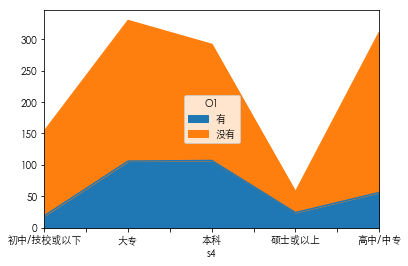

In [58]:
tmpdf.plot.area()

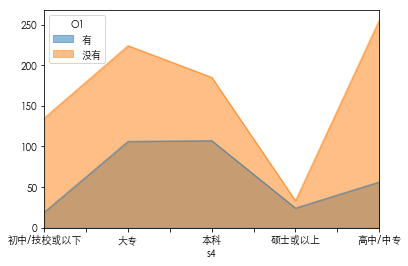

In [59]:
tmpdf.plot.area(stacked = False)

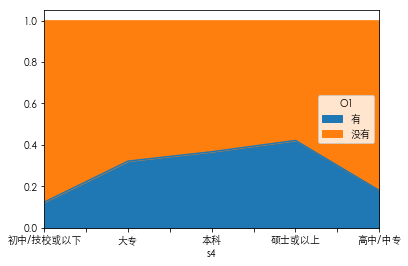

In [60]:
# 按照百分比填充面积
pd.crosstab(index = ccss.s4, columns = ccss.O1,
            normalize = 'index').plot.area()